# Women's Clothing E-Commerce with Natural Language Processing 
_by Nick "Upping his game for 2018" Brooks, Janurary 2018_

- [**Github**](https://github.com/nicapotato)
- [**Kaggle**](https://www.kaggle.com/nicapotato/)
- [**Linkedin**](https://www.linkedin.com/in/nickbrooks7)

***

**Programming Language:** Python 3.5 in the Jupyter Notebook Environment

**Textbook Resources Used:** <br>
- Swamynathan, Manohar. Mastering Machine Learning with Python in Six Steps: a Practical
- Implementation Guide to Predictive Data Analytics Using Python. Apress, 2017.
- Bird, Steven. Natural Language Processing with Python. O&#39;Reilly Media, 2016.

**Code Navigation:** <br>
In the code, text after hastags (#) are supportive explanations, not executed as code.
Indented line signifies code is part of larger function or loop. Not standalone. Furthermore,
functions are used in order to facilitate the simplicity and exploratory process of the code.
Code: Packages Used

# Tables of Content:

1. [Introduction](#Introduction)
2. [Pre-Processing](#Pre-Processing)
3. [Helper/Utility Functions](#Helper/Utility Functions)
4. [Exploratory Data Analysis](#Exploratory Data Analysis)
5. [Sentiment Analysis](#Sentiment Analysis)
6. [Word Distribution and Word Cloud](#Word Distribution and Word Cloud)
7. [Supervised Learning](#Supervised Learning)
8. [Word2Vec](#Word2Vec)

# **1. Introduction:** <a id="Introduction"></a> <br>
This notebook is concerned with using the Python programming language and Natural Language Processing technology to explore trends in the customer reviews from an anonymized women’s clothing E-commerce platform, and extract actionable plans to improve its online e-commerce. The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information. This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers. The total number of unique words in the dataset is 9810. In this analysis, the data will be introduced using exploratory data analysis, and will be further analyzed by employing:

** METHODS **
- **Text Pre-Processing**
- **Data Visualization**
- **Frequency distribution**
- **Word Clouds**
- **Sentiment Analysis**
- **Naive Bayes**
- **Word2Vec**

# Summarized Findings:


In [1]:
# General
import numpy as np
import pandas as pd
import nltk
import random
import os
from os import path
from PIL import Image

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

# Set Plot Theme
sns.set_palette([
    "#30a2da",
    "#fc4f30",
    "#e5ae38",
    "#6d904f",
    "#8b8b8b",
])
# Alternate # plt.style.use('fivethirtyeight')

# Pre-Processing
import string
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import re
from nltk.stem import PorterStemmer

# Modeling
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk.util import ngrams
from collections import Counter
from gensim.models import word2vec

# Warnings
# import warnings
# warnings.filterwarnings('ignore')

D:\WindowsApps\Anaconda\envs\tensorflow\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "
D:\WindowsApps\Anaconda\envs\tensorflow\lib\site-packages\gensim\utils.py:860: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


**Code Explanation and Reasoning:** <br>
These packages are seperated in four categories: *General, Visualization, Pre-Processing, and Modeling*.

The General category includes the basic data manipulation tools for scientific computation (numpy), dataframes (pandas), Natural Language Processing (NLTK), path directory manipulation (os), and image saving (PIL).

The Visualiation section enables the creation of simple graphics (matplotlib, seaborn), aswell as wordclouds (wordcloud).

The Pre-Processing section extracts more specialized modules from the NLTK package such as tokenizers and stemmers to enable the preperation of text data for mathematical analysis.

The Modeling section includes NLTK’s sentiment analysis module, which can determine the mood of text, NLTK’s N-grams, and gensim’s word2vec.

In [2]:
# Read and Peak at Data
df = pd.read_csv("Women's Clothing E-Commerce Reviews.csv")
df.drop(df.columns[0],inplace=True, axis=1)
df.sample(3)

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
23307,1020,60,Cute tensile style jean skirt,Adorable skirt but fit is definitely too tight...,4,1,5,General,Bottoms,Skirts
23265,1056,61,Love these pants!!,I rarely order pants on line...as the size oft...,5,1,1,General Petite,Bottoms,Pants
461,850,52,"Very pretty, boho chic",I purchased this blouse because i love a 70's ...,5,1,5,General Petite,Tops,Blouses


In [3]:
# Boolean for Positive and Negative Reviews
df["Label"] = 0
df.loc[df.Rating >= 3,["Label"]] = 1

# Delete missing observations for following variables
for x in ["Division Name","Department Name","Class Name","Review Text"]:
    df = df[df[x].notnull()]

# Extracting Missing Count and Unique Count by Column
unique_count = []
for x in df.columns:
    unique_count.append([x,len(df[x].unique()),df[x].isnull().sum()])

# Converting to Categorical Vars
for x in [x for x,y,z in unique_count if y < 40]:
    df[x]= df[x].astype('category')

# Missing Values
print("Missing Values: {}".format(df.isnull().sum().sum()))

# Data Dimensions
print("Dataframe Dimension: {} Rows, {} Columns".format(*df.shape))

Missing Values: 2966
Dataframe Dimension: 22628 Rows, 11 Columns


In [4]:
df = df[df.notnull()]

**Code Explanation and Reasoning**: <br>
After reading in the data, a binary variable is created to better to generalize "good" and "bad" reviews. It is important to note that rating is a personal level judgement. Perhaps the "Recommended" feature may provide more insight into the value of the product, since customers are putting their reputation on the line to state whether they think its worth wearing. This social dimension is paramount when it comes to this product. Indeed, I found that many reviews would declare the social responce and experience they had while wearing the clothing item.

Next, the dataset is purged of observation where the review text is unavailable. This was done because the review is the heart of this analysis. Infact, there are additional missing values, which I will leave for now, since they may provide usable extra information.

***

## 2. Univariate Distribution <a id="Univariate"></a>

To start off my analysis, I will first take a look at the distribution of individual variables. This is a good way to see what I am up against, and understand the context of the subsequent multi-variate analysis.

In [5]:
pd.DataFrame(unique_count, columns=["Column","Unique","Missing"]).set_index("Column").T

Column,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Label
Unique,1172,77,13984,22621,5,2,82,3,6,20,2
Missing,0,0,2966,0,0,0,0,0,0,0,0


**Interpretation** <br>
There are approximately 3000 missing values, which represents 1% of the dataset, but the dataset will not get trimmed further since the review text body is the only variable that must be complete.

Amongst the categorical variables, the high unique count of Clothing ID and Class Names will require non-visual exploratory methods.

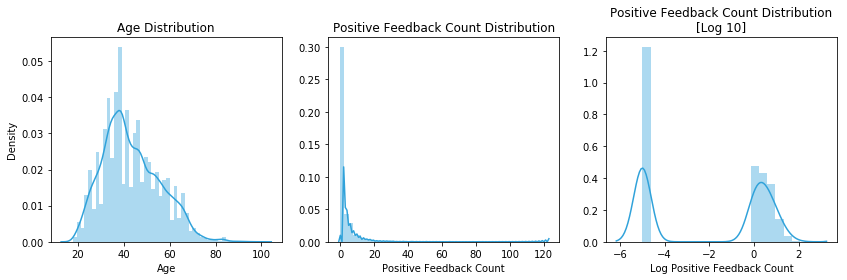

In [6]:
# Continous Distributions
f, ax = plt.subplots(1,3,figsize=(12,4), sharey=False)
sns.distplot(df.Age, ax=ax[0])
ax[0].set_title("Age Distribution")
ax[0].set_ylabel("Density")
sns.distplot(df["Positive Feedback Count"], ax=ax[1])
ax[1].set_title("Positive Feedback Count Distribution")
sns.distplot(np.log10((df["Positive Feedback Count"][df["Positive Feedback Count"].notnull()]+0.00001)), ax=ax[2])
ax[2].set_title("Positive Feedback Count Distribution\n[Log 10]")
ax[2].set_xlabel("Log Positive Feedback Count")
plt.tight_layout()
plt.show()

**Code Explanation:** <br>
Using Matplotlib, a simple variable frequency bar/density plot is created. In the log positive feedback count plot, I had to add 0.0001 to all values so that the logarithm of previously zero values can be taken.

**Distribution of Age:** <br>
My a priori expectation was that the biggest group of reviewing customers would be young, tech savvy women between the age of 18 and 34. However, this plot would say otherwise, since it appears that not only is the 34 to 50 year old age most engage in reviewing products, they also appear to be the most positive reviewers, since they proportionately give higher more reviews of 5. Before making insight about these point, it would be wise to gather further data on the age distribution of shoppers. Nevertheless, this trend suggest that the core market segment for this clothing brand is women between 34 and 50.

**Distribution of Positive Feedback Count:** <br>
This kind of distribution is common for network effect phenomenon, where popularity has an exponential effect on response, and most individuals receive no attention.

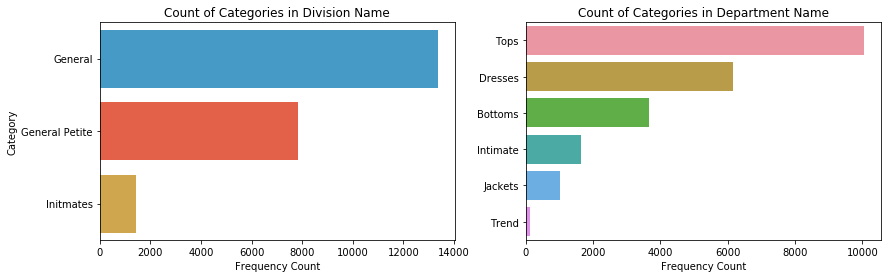

In [7]:
row_plots = ["Division Name","Department Name"]
f, axes = plt.subplots(1,len(row_plots), figsize=(14,4), sharex=False)

for i,x in enumerate(row_plots):
    sns.countplot(y=x, data=df,order=df[x].value_counts().index, ax=axes[i])
    axes[i].set_title("Count of Categories in {}".format(x))
    axes[i].set_xlabel("")
    axes[i].set_xlabel("Frequency Count")
axes[0].set_ylabel("Category")
axes[1].set_ylabel("")
plt.show()

**Code Explanation:** <br>
Enumerating the loop enables the loop iteration to coincide with the matplotlib subplot ax.

**Distribution of Division Name** <br>
This high level feature describes had three categories: General, Petite, and Intimates. This offers some insight into the clothing sizes of the customers leaving reviews.

**Distribution of Department Name** <br>
It is notable to observse that *Tops and Dresses* are the most commonly reviewed products. It would be interesting to investigate the motivation of leaving a review in the first place.

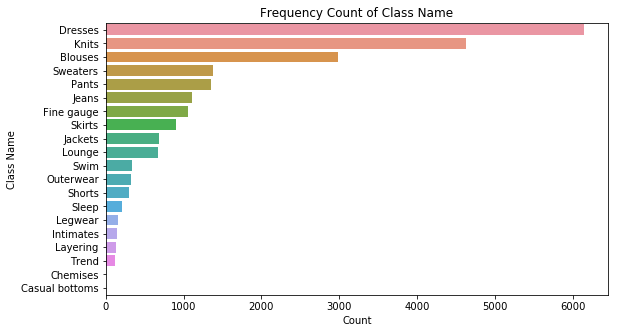

In [8]:
# Class Name
plt.subplots(figsize=(9,5))
sns.countplot(y="Class Name", data=df,order=df["Class Name"].value_counts().index)
plt.title("Frequency Count of Class Name")
plt.xlabel("Count")
plt.show()

**Interpretation:** <br>
Exploring the class variable suggests that the most popular clothing types are: Petite and Anthro, Dresses, Blouses, and Cut and Sew Knits. The distribution of reviews is fairly constant, suggesting that there are not negative nor positive outliers. This statement has been further verified by taking the mean of the label by class group. The results show that no class falls above .80, and the majority rest at .90. Casual bottoms and Chemises scored the highest in this criteria with a 100% positive review rate, however upon investigation this is because only 4 reviews were made in these categories.

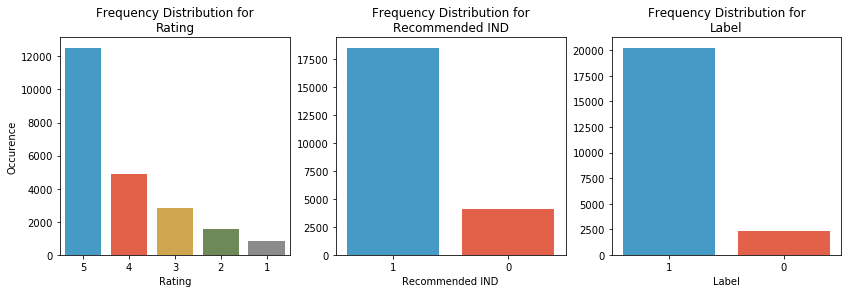

In [9]:
cat_dtypes = [x for x,y,z in unique_count if y < 10 and x not in ["Division Name","Department Name"]]
increment = 0
f, axes = plt.subplots(1,len(cat_dtypes), figsize=(14,4), sharex=False)

for i in range(len(cat_dtypes)):
    sns.countplot(x=cat_dtypes[increment], data=df,order=df[cat_dtypes[increment]].value_counts().index, ax=axes[i])
    axes[i].set_title("Frequency Distribution for\n{}".format(cat_dtypes[increment]))
    axes[i].set_ylabel("Occurence")
    axes[i].set_xlabel("{}".format(cat_dtypes[increment]))
    increment += 1
axes[1].set_ylabel("")
axes[2].set_ylabel("")
plt.show()

**Code Explanation:**
Yet another way to iterate plots, where I both loop over the index position of cat_dtypes and subplot ax at the same time with range of the length of cat_dtypes.

**Distribution of Rating:** <br>
The vast majority of reviews were highly positive, with a score of five out of five. This suggests that this retail store is performing fairly well, but then again, I am not familiar with the industry benchmark. Competitor reviews may be scraped and analyzed. It is important to note that these reviews are subjective, and some negative reviews may a outcome of a bad day, instead of constructive feedback. In the plot below, the Label plot is the binary classification of 1 = good, and 0= bad.

**Distribtuion of Recommended IND:** <br>
This variable mirrors the positivity of the Rating distribution, but as mentioned earlier, I believe that it provides variation of positivity which is social, rather than personal.

**Distribution of Label:** <br>
I am surprised to see that products are rated 3 and over, than are recommended by the customer. I am eager to see the multi-variate interaction between Rating and Recommended.

***

## 3. Multivariate Distribution <a id="Multivariate"></a>
### 3.1 Categorical Variable by Categorical Variable
In this section, I utilize heatmaps to visualize the percentage occurence pivot table.

**Division Name by Department Name:**

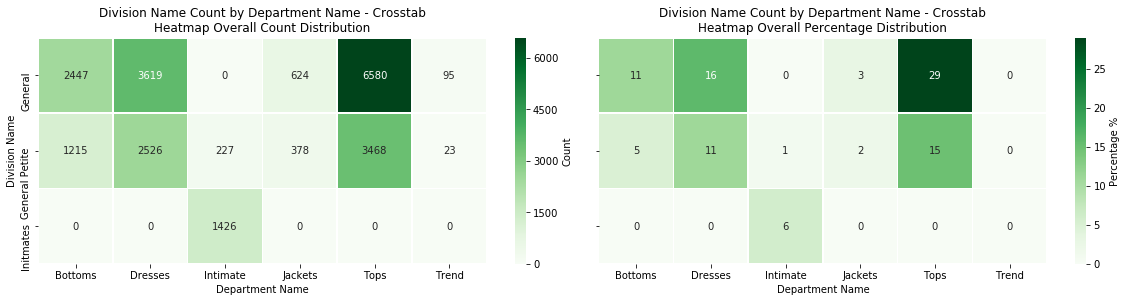

In [10]:
# Heatmaps of Percentage Pivot Table
f, ax = plt.subplots(1,2,figsize=(16, 4), sharey=True)
sns.heatmap(pd.crosstab(df['Division Name'], df["Department Name"]),
            annot=True, linewidths=.5, ax = ax[0],fmt='g', cmap="Greens",
                cbar_kws={'label': 'Count'})
ax[0].set_title('Division Name Count by Department Name - Crosstab\nHeatmap Overall Count Distribution')

sns.heatmap(pd.crosstab(df['Division Name'], df["Department Name"], normalize=True).mul(100).round(0),
            annot=True, linewidths=.5, ax=ax[1],fmt='g', cmap="Greens",
                cbar_kws={'label': 'Percentage %'})
ax[1].set_title('Division Name Count by Department Name - Crosstab\nHeatmap Overall Percentage Distribution')
ax[1].set_ylabel('')
plt.tight_layout(pad=0)
plt.show()

**How to Interpret:** <br>
For the second heatmap on the right, the percentages occurence is in relation to the whole.

**Interpretation:** <br>
Evidently, the most common product is a normal sized top.

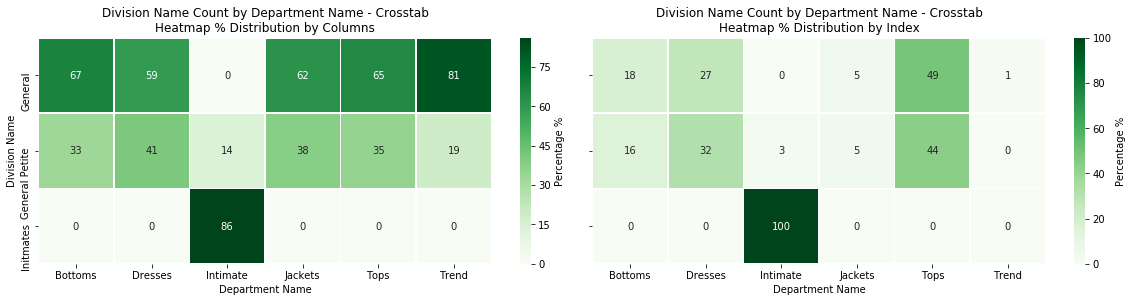

In [11]:
# Heatmaps of Percentage Pivot Table
f, ax = plt.subplots(1,2,figsize=(16, 4), sharey=True)
sns.heatmap(pd.crosstab(df['Division Name'], df["Department Name"], normalize='columns').mul(100).round(0),
            annot=True, linewidths=.5, ax=ax[0],fmt='g', cmap="Greens",
                cbar_kws={'label': 'Percentage %'})
ax[0].set_title('Division Name Count by Department Name - Crosstab\nHeatmap % Distribution by Columns')

sns.heatmap(pd.crosstab(df['Division Name'], df["Department Name"], normalize='index').mul(100).round(0),
            annot=True, linewidths=.5, ax=ax[1],fmt='g', cmap="Greens",
                cbar_kws={'label': 'Percentage %'})
ax[1].set_title('Division Name Count by Department Name - Crosstab\nHeatmap % Distribution by Index')
ax[1].set_ylabel('')
plt.tight_layout(pad=0)
plt.show()

**How to Interpret:** <br>
Although these two heatmaps use the same features, they different in the relation in which the percentage is taken. For the first plot on the left, the cumulative percentage of each column is 100%, while the plot on the right has is **standardized by row**.

**Interpretation:** <br>
The dominance of the *General* size is consistent accross the various categories within **Department Name**. There a notable overall between *General Petite* and *Department Name*.

***
**Class Name by Department Name:**

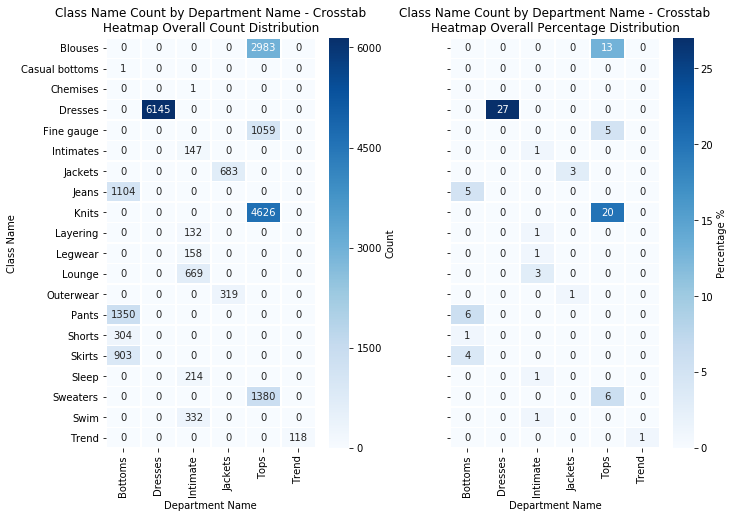

In [12]:
# Heatmaps of Percentage Pivot Table
f, ax = plt.subplots(1,2,figsize=(10, 7), sharey=True)
fsize = 13
sns.heatmap(pd.crosstab(df['Class Name'], df["Department Name"]),
            annot=True, linewidths=.5, ax = ax[0],fmt='g', cmap="Blues",
                cbar_kws={'label': 'Count'})
ax[0].set_title('Class Name Count by Department Name - Crosstab\nHeatmap Overall Count Distribution')

sns.heatmap(pd.crosstab(df['Class Name'], df["Department Name"], normalize=True).mul(100).round(0),
            annot=True, linewidths=.5, ax=ax[1],fmt='g', cmap="Blues",
                cbar_kws={'label': 'Percentage %'})
ax[1].set_title('Class Name Count by Department Name - Crosstab\nHeatmap Overall Percentage Distribution')
ax[1].set_ylabel('')
plt.tight_layout(pad=0)
plt.show()

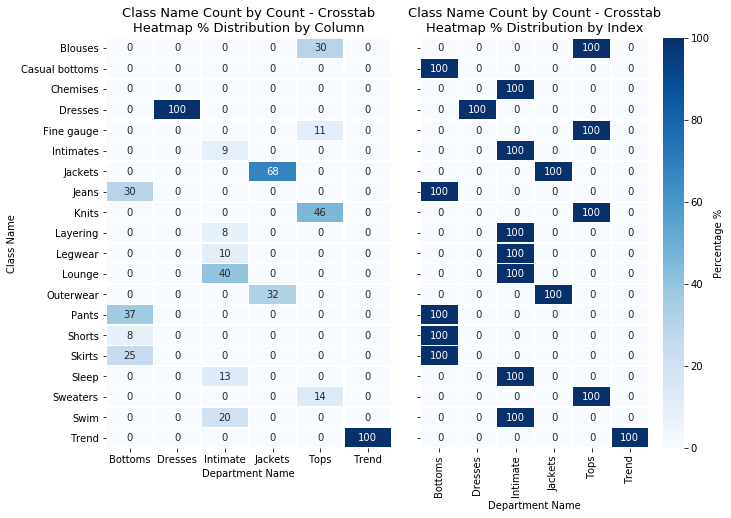

In [13]:
# Heatmaps of Percentage Pivot Table
f, ax = plt.subplots(1,2,figsize=(10, 7), sharey=True)
fsize = 13
sns.heatmap(pd.crosstab(df['Class Name'], df["Department Name"], normalize = 'columns').mul(100).round(0)
            ,annot=True, fmt="g", linewidths=.5, ax=ax[0],cbar=False,cmap="Blues")
ax[0].set_title('Class Name Count by Count - Crosstab\nHeatmap % Distribution by Column', fontsize = fsize)
ax[1] = sns.heatmap(pd.crosstab(df['Class Name'], df["Department Name"], normalize = 'index').mul(100).round(0)
            ,annot=True, fmt="2g", linewidths=.5, ax=ax[1],cmap="Blues",
                cbar_kws={'label': 'Percentage %'})
ax[1].set_title('Class Name Count by Count - Crosstab\nHeatmap % Distribution by Index', fontsize = fsize)
ax[1].set_ylabel('')
plt.tight_layout(pad=0)
plt.show()

***
**Division Name by Department Name:**

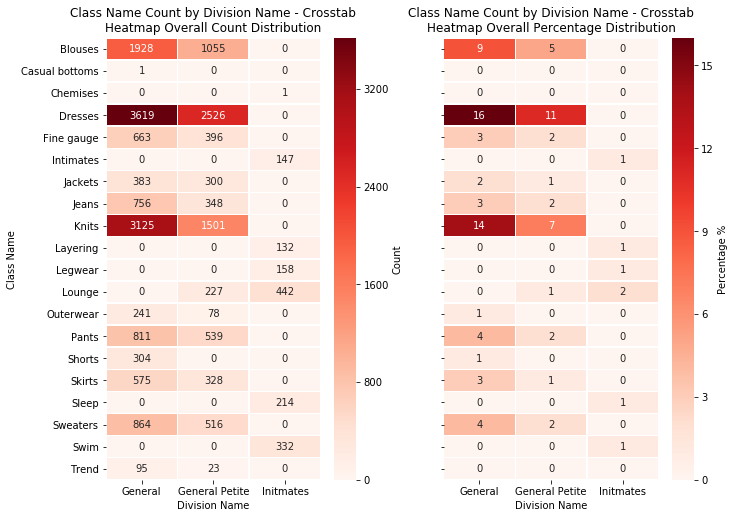

In [14]:
# Heatmaps of Percentage Pivot Table
f, ax = plt.subplots(1,2,figsize=(10, 7), sharey=True)
fsize = 13
sns.heatmap(pd.crosstab(df['Class Name'], df["Division Name"]),
            annot=True, linewidths=.5, ax = ax[0],fmt='g', cmap="Reds",
                cbar_kws={'label': 'Count'})
ax[0].set_title('Class Name Count by Division Name - Crosstab\nHeatmap Overall Count Distribution')

sns.heatmap(pd.crosstab(df['Class Name'], df["Division Name"], normalize=True).mul(100).round(0),
            annot=True, linewidths=.5, ax=ax[1],fmt='g', cmap="Reds",
                cbar_kws={'label': 'Percentage %'})
ax[1].set_title('Class Name Count by Division Name - Crosstab\nHeatmap Overall Percentage Distribution')
ax[1].set_ylabel('')
plt.tight_layout(pad=0)
plt.show()

**Interpretation:** <br>
While *General Tops* are the most common **Division and Department**, its supremecy is spread over multiple products. Meanwhile, *Dresses* are single-handedly the most popular item.

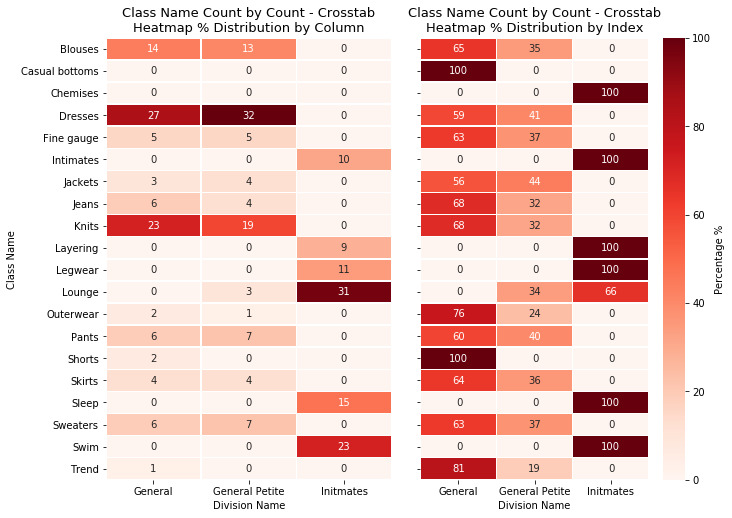

In [15]:
# Heatmaps of Percentage Pivot Table
f, ax = plt.subplots(1,2,figsize=(10, 7), sharey=True)
fsize = 13
sns.heatmap(pd.crosstab(df['Class Name'], df["Division Name"], normalize = 'columns').mul(100).round(0)
            ,annot=True, fmt="g", linewidths=.5, ax=ax[0],cbar=False,cmap="Reds")
ax[0].set_title('Class Name Count by Count - Crosstab\nHeatmap % Distribution by Column', fontsize = fsize)
ax[1] = sns.heatmap(pd.crosstab(df['Class Name'], df["Division Name"], normalize = 'index').mul(100).round(0)
            ,annot=True, fmt="2g", linewidths=.5, ax=ax[1],cmap="Reds",
                cbar_kws={'label': 'Percentage %'})
ax[1].set_title('Class Name Count by Count - Crosstab\nHeatmap % Distribution by Index', fontsize = fsize)
ax[1].set_ylabel('')
plt.tight_layout(pad=0)

# MANUAL NORMALIZE with Applied Lambda on Pandas DataFrame
# ctab = pd.crosstab(df['Class Name'], df["Rating"]).apply(lambda r: r/r.sum(), axis=1).mul(100)

**Interpretation:** <br>
This heatmap above exposes the redundant nature of the "Division Name" variable. Furthermore, it indicates that "Petite" is a unecessary category within "Class Name" since it is already described in the "Department Name" variable as "Petites".

It should also be noted that "Department Name's" Other category only applies to dresses, so it should be renamed as such.

***
### 3.2  Continuous Variable by Categorical Variable

Here I want to look at the behavior of the continous variables when sliced by various categorical varibles.

D:\WindowsApps\Anaconda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until


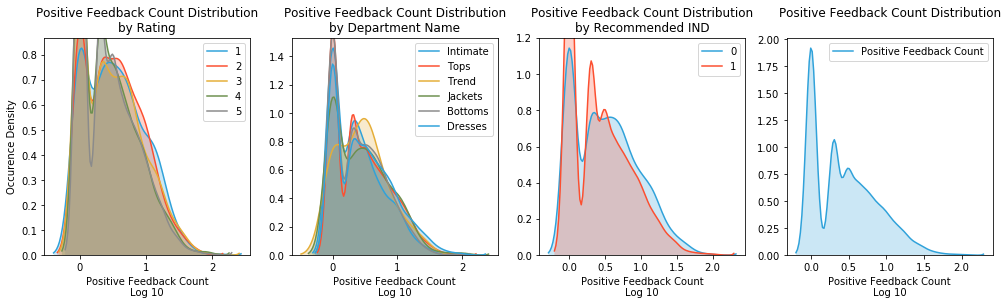

In [16]:
f, axes = plt.subplots(1,4, figsize=(17,4), sharex=False)
xvar = 'Positive Feedback Count'
plotdf = np.log10(df['Positive Feedback Count'])
for i,y in enumerate(["Rating","Department Name","Recommended IND"]):
    for x in set(df[y][df[y].notnull()]):
        sns.kdeplot(plotdf[df[y]==x], label=x, shade=True, ax=axes[i])
    axes[i].set_xlabel("{}\nLog 10".format(xvar))
    axes[i].set_label('Occurence Density')
    axes[i].set_title('{} Distribution\nby {}'.format(xvar, y))

axes[0].set_ylabel('Occurence Density')

sns.kdeplot(plotdf,shade=True,ax=axes[3])
axes[3].set_xlabel("{}\nLog 10".format(xvar))
axes[3].set_title('{} Distribution\n'.format(xvar))
plt.show()

**Interpretation:** <br>


D:\WindowsApps\Anaconda\envs\tensorflow\lib\site-packages\numpy\core\_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
D:\WindowsApps\Anaconda\envs\tensorflow\lib\site-packages\numpy\core\_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
D:\WindowsApps\Anaconda\envs\tensorflow\lib\site-packages\statsmodels\nonparametric\bandwidths.py:22: RuntimeWarning: invalid value encountered in minimum
  return np.minimum(np.std(X, axis=0, ddof=1), IQR)


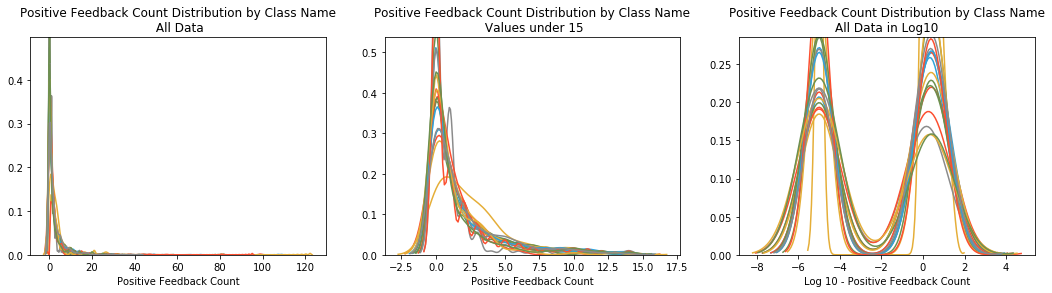

In [17]:
f, axes = plt.subplots(1,3, figsize=(18,4), sharex=False)
for x in set(df["Class Name"][df["Class Name"].notnull()]):
    sns.kdeplot(df['Positive Feedback Count'][df["Class Name"]==x]
                ,label=x, shade=False, ax=axes[0])
    
axes[0].legend_.remove()
axes[0].set_xlabel('{}'.format(xvar))
axes[0].set_title('{} Distribution by {}\n All Data'.format(xvar, "Class Name"))

min_value = 15
for x in set(df["Class Name"][df["Class Name"].notnull()]):
    sns.kdeplot(df['Positive Feedback Count'][(df["Class Name"]==x) &
                                              (df["Positive Feedback Count"] < min_value)]
                ,label=x, shade=False, ax=axes[1])
    
axes[1].legend_.remove()
axes[1].set_xlabel('{}'.format(xvar))
axes[1].set_title('{} Distribution by {}\n Values under {}'.format(xvar, "Class Name", min_value))

for x in set(df["Class Name"][df["Class Name"].notnull()]):
    sns.kdeplot(np.log10(df['Positive Feedback Count']+0.00001)[df["Class Name"]==x]
                ,label=x, shade=False, ax=axes[2])
    
axes[2].legend_.remove()
axes[2].set_xlabel('Log 10 - {}'.format(xvar))
axes[2].set_title('{} Distribution by {}\nAll Data in Log10'.format(xvar, "Class Name"))
plt.show()

**Interpretation:** <br>

D:\WindowsApps\Anaconda\envs\tensorflow\lib\site-packages\numpy\core\_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
D:\WindowsApps\Anaconda\envs\tensorflow\lib\site-packages\numpy\core\_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
D:\WindowsApps\Anaconda\envs\tensorflow\lib\site-packages\statsmodels\nonparametric\bandwidths.py:22: RuntimeWarning: invalid value encountered in minimum
  return np.minimum(np.std(X, axis=0, ddof=1), IQR)


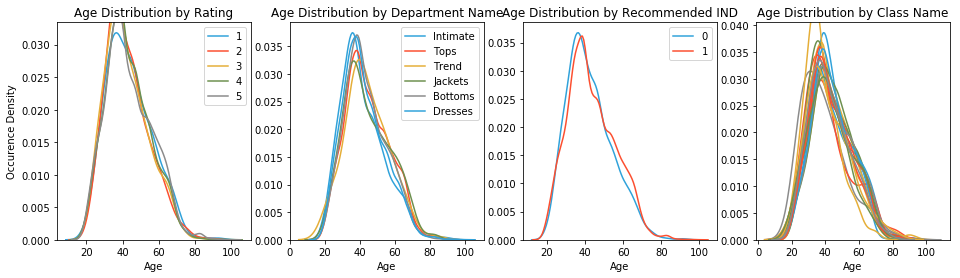

In [18]:
f, axes = plt.subplots(1,4, figsize=(16,4), sharex=False)
xvar = "Age"
plotdf = df["Age"]
for i,y in enumerate(["Rating","Department Name","Recommended IND"]):
    for x in set(df[y][df[y].notnull()]):
        sns.kdeplot(plotdf[df[y]==x], label=x, shade=False, ax=axes[i])
    axes[i].set_xlabel("{}".format(xvar))
    axes[i].set_label('Occurence Density')
    axes[i].set_title('{} Distribution by {}'.format(xvar, y))

for x in set(df["Class Name"][df["Class Name"].notnull()]):
    sns.kdeplot(plotdf[df["Class Name"]==x], label=x, shade=False, ax=axes[3])

axes[3].legend_.remove()
axes[3].set_xlabel('{}'.format(xvar))
axes[0].set_ylabel('Occurence Density')
axes[3].set_title('{} Distribution by {}'.format(xvar, "Class Name"))
plt.show()

**Interpretation:** <br>

### 3.4 Continous Variables  on Continous Variables

Time for some scatter plots. with [Seaborn Joint Plot](https://tryolabs.com/blog/2017/03/16/pandas-seaborn-a-guide-to-handle-visualize-data-elegantly/).

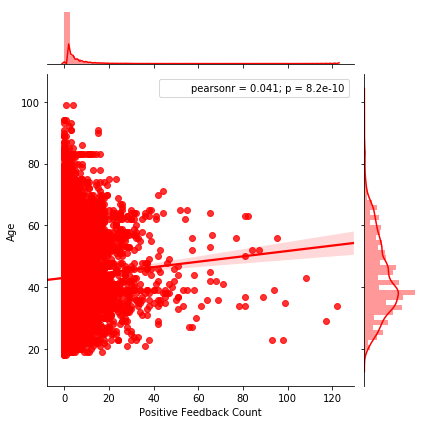

In [19]:
sns.jointplot(x= df["Positive Feedback Count"], y=df["Age"], kind='reg', color='r')
plt.show()

**Interpretation:** <br>
There appears to be a slight correlation between age and positive feedback count received. It would be interesting to focus on the textual anatomy of high positive feedback reviews.
***

### 3.5 Normalized Distribution Plots

Since many variables are severely unbalanced, I employ normalization to see if the proportion is consistent between categorical classes. 

[Normalization in Seaborn - Stackoverflow](https://stackoverflow.com/questions/34615854/seaborn-countplot-with-normalized-y-axis-per-group)

In [20]:
def norm_barplot(x,y,hue, data, ax=None, order= None):
    """
    Normalize the data using pandas functions, then plot using Seaborn.
    Function arguments are and extention of Seaborns'.
    """
    sns.barplot(x= x, y=y, hue=hue, ax=ax, order=order,
    data=(data[[x, hue]]
     .reset_index(drop=True)
     .groupby([x])[hue]
     .value_counts(normalize=True)
     .rename('Percentage').mul(100)
     .reset_index()
     .sort_values(hue)))
    plt.title("Percentage Frequency of {} by {}".format(hue,x))
    plt.ylabel("Percentage %")

**Code Explanation:** <br>
***
**Recommended IND by Department and Division**

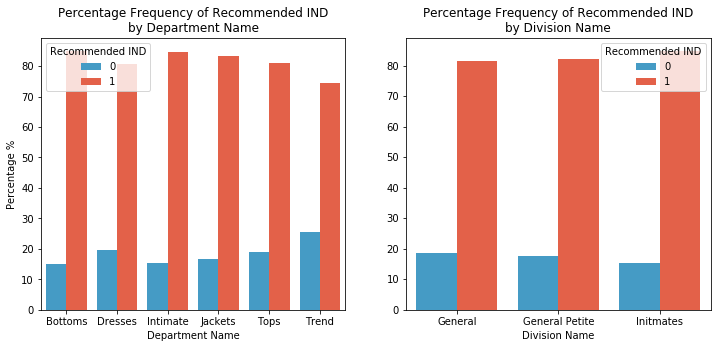

In [21]:
huevar = "Recommended IND"
f, axes = plt.subplots(1,2,figsize=(12,5))
norm_barplot(x="Department Name",y="Percentage", hue=huevar,data=df, ax=axes[0])
axes[0].set_title("Percentage Frequency of {}\nby Department Name".format(huevar))
axes[0].set_ylabel("Percentage %")
norm_barplot(x="Division Name",y="Percentage", hue=huevar,data=df, ax=axes[1])
axes[1].set_title("Percentage Frequency of {}\nby Division Name".format(huevar))
axes[1].set_ylabel("")
plt.show()

**Interpretation:** <br>
***
**Rating by Department and Divison Name**

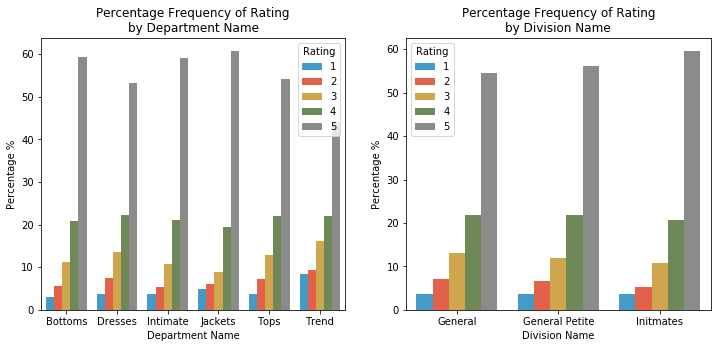

In [22]:
xvar = ["Department Name","Division Name"]
huevar = "Rating"
f, axes = plt.subplots(1,2,figsize=(12,5))
norm_barplot(x=xvar[0],y="Percentage", hue=huevar,data=df, ax=axes[0])
axes[0].set_title("Percentage Frequency of {}\nby {}".format(huevar, xvar[0]))
axes[0].set_ylabel("Percentage %")
norm_barplot(x=xvar[1],y="Percentage", hue="Rating",data=df, ax=axes[1])
axes[1].set_title("Percentage Frequency of {}\nby {}".format(huevar, xvar[1]))
plt.show()

**Interpretation:** <br>

***
**Rating by Recommended IND**

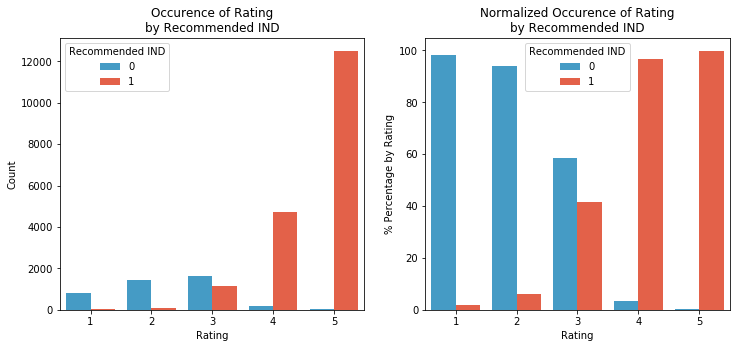

In [23]:
huevar = "Rating"
f, axes = plt.subplots(1,2,figsize=(12,5))
sns.countplot(x="Rating", hue="Recommended IND",data=df, ax=axes[0])
axes[0].set_title("Occurence of {}\nby {}".format(huevar, "Recommended IND"))
axes[0].set_ylabel("Count")
norm_barplot(x="Rating",y="Percentage", hue="Recommended IND",data=df, ax=axes[1])
axes[1].set_title("Normalized Occurence of {}\nby {}".format(huevar, "Recommended IND"))
axes[1].set_ylabel("% Percentage by Rating")
plt.show()

**Interpretation:** <br>

***

## 3.6 Multivariate Analysis

**Rating by Recommended IND**

Since I want to take the average of the **Rating** variable, I must convert it from a pandas 'category' variable to an integer.

In [24]:
df.Rating = df.Rating.astype(int)

In [25]:
df.columns

Index(['Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name', 'Label'],
      dtype='object')

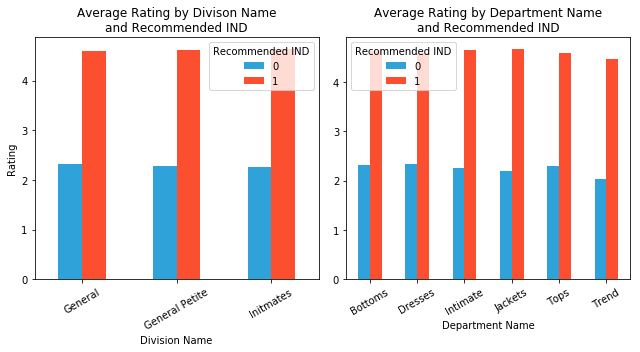

In [26]:
f, axes = plt.subplots(1,2,figsize=(9,5))
rot = 30
df.pivot_table('Rating', index='Division Name',
               columns=['Recommended IND']).plot.bar(ax=axes[0], rot=rot)
axes[0].set_title("Average Rating by Divison Name\nand Recommended IND")
df.pivot_table('Rating', index='Department Name',
               columns=['Recommended IND']).plot.bar(ax=axes[1], rot=rot)
axes[0].set_ylabel("Rating")
axes[1].set_title("Average Rating by Department Name\nand Recommended IND")
f.tight_layout()
#f.subplots_adjust(top=0.93)
plt.show()

In [27]:
# sns.factorplot(x="Department Name", y="Age", hue="smoker"#,col="day",
#                data=df, kind="box", size=4, aspect=.5);

***
**Clustering Dendrogram**

In [28]:
# CLUSTERING # https://python-graph-gallery.com/404-dendrogram-with-heat-map/

***

## 4.  Text <a id="Text"></a>

Now that a general understanding of the variables have been laid out, I will begin to analysis the customer reviews.

### 4.1 Pe-Processing

In [29]:
pd.set_option('max_colwidth', 500)
df[["Title","Review Text", "Rating"]].sample(7)

,Title,Review Text,Rating
352,"Exquisite blouse, runs huge","I normally wear a large or extra-large; the medium is still very billowy on me. this blouse is ethereal and lovely, though - pretty and funky at the same time. it's sheer but somehow not revealing. perfect for when you want to look composed and cool on the hottest day of the summer.",5
11362,Beautiful dress!,"I'm super happy with this dress! it's extremely well made, very light and comfortable and the shoulder cutouts are tastefully done. this dress is cotton but doesn't look cheap or too casual; it's one of those rare finds that will look great dressed up or down. this will absolutely work across seasons, with leggings and boots/booties or bare legs and sandals when spring comes around. i do feel like it runs a little large, but again it's 100% cotton so i know there will be some shrinking when ...",5
19277,Comfy and pretty,I bought this in red and wear it a lot. it is so soft and comfortable! i love all the fabric and the design. the longer sleeve length is amazing! it is a perfect tee! you can tell from the pics there's a lot a fabric and it's supposed to be loose and drape like that. it fits like in the pics and is true to size. wear a tank underneath in case there's a strong wind.,5
3401,Very cute jacket,"Love the swing-style boxy fit. versatile - works well over jeans or any pants and top. like the coated linen (or cotton?) look. serves much the same purpose as any light weight or denim jacket - good to wear over a top to complete an outfit or as an extra thin layer but not a substantial outdoor jacket. really quite cute. fairly tts but if between sizes, size down.",4
5800,Cute!,"This is a pretty adorable jumper. the size 8 would fit someone really well who's about a typical size 6 and maybe 5'6"". i'm 5'9"" and it was too short. it's fun and definitely different. i'd otherwise wear it.",3
9069,NaN,"I love how these jeans look on. tts, adorable. i exchanged my first pair due to stitching coming out in the back right pocket. pair #2 -the stitching came out in the exact same place. this seems to be a problem with the quality/sewing. the fact that the stitching is gold and decorative as well as functional means it will keep unraveling until the jeans are ruined. 2nd pair has to go back. too bad.",2
10536,Love these jeans!,"This is the 4th pair of ag stevie jeans i have bought from retailer. the petite sizing fit me great (i'm 5'1 and 112 lbs) the quality is fabulous and worth the price. i have 2 denim, 1 white, and just purchased these dark wave. i went to the ag store and they do not carry petities. this jean is made exclusively for retailer. love them!",5


Evidently, the text data requires further processing .

In [30]:
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.porter import PorterStemmer
#ps = LancasterStemmer()
ps = PorterStemmer()

tokenizer = RegexpTokenizer(r'\w+')
stop_words = set(stopwords.words('english'))

def preprocessing(data):
    txt = data.str.lower().str.cat(sep=' ') #1
    words = tokenizer.tokenize(txt) #2
    words = [w for w in words if not w in stop_words] #3
    #words = [ps.stem(w) for w in words] #4
    return words

**Code Explanation:** <br>
This chunk of code creates a function that takes each review and combines them into one seamless text. It then applies lowercase, tokenizer, removes stopwords and punctuation, and finally uses the PorterStemmer.

***

**Interpretation:** <br>
In order to process the dataset’s centerpiece, the review body, I utilized the NLTK package to lowercase, tokenize, and remove stopwords and punctuation. Tokenizing treats each word as its own value, while the other steps gets rid of the noise and irrelevant symbols in the data, standardizing the reviews for analysis. Upon reviewing the performance of text analysis, I decided to implement the Porter Stemmer on the tokens in order to combine words with tense and plurality deviance. I contemplated exploring the use of sequential models, such as Long Short-term memory, which would benefit from stopwords, but unfortunately I could only find predictive applications of it, no insight extracting aspects. 

The last piece of data transformation conducted was to bin the continuous variable age into a categorical variable: age category.

### 2.2 Helper/Utility Functions <a id="Helper/Utility Functions"></a>

***

### 4.2 Sentiment Analysis <a id="Sentiment Analysis"></a>

My first attempt at understanding the customer reviews is to see how the textual sentiment relates to the rating scores. With this method, it will be possible to distinguish outright positive and negative comments from the contructive variant.

I will also explore the interaction between sentiment score:
- Raiting
- Recommended
- Positive Feedback Count

In [31]:
# Pre-Processing
SIA = SentimentIntensityAnalyzer()
df["Review Text"]= df["Review Text"].astype(str)

# Applying Model, Variable Creation
df['Polarity Score']=df["Review Text"].apply(lambda x:SIA.polarity_scores(x)['compound'])
df['Neutral Score']=df["Review Text"].apply(lambda x:SIA.polarity_scores(x)['neu'])
df['Negative Score']=df["Review Text"].apply(lambda x:SIA.polarity_scores(x)['neg'])
df['Positive Score']=df["Review Text"].apply(lambda x:SIA.polarity_scores(x)['pos'])

# Converting 0 to 1 Decimal Score to a Categorical Variable
df['Sentiment']=''
df.loc[df['Polarity Score']>0,'Sentiment']='Positive'
df.loc[df['Polarity Score']==0,'Sentiment']='Neutral'
df.loc[df['Polarity Score']<0,'Sentiment']='Negative'

#### **Code Explanation:** <br>
*Pre-processing* chunk loads the NLTK Sentiment Intensity Analyzer module, selects desired variables, and finally applies lowercasing to the column of reviews in the dataframe. The second paragraph of code *Applying Model and Variable Creation* classifies each review in the dataset on three dimensions: Positive, Neutral, and Negative. These results are stored in three respective columns. The overall sentiment is then determined and stored in the Sentiment column.

- Neutral/Negative/Postive Score: Indicates the potency of these classes between 0 and 1. Onl
- Polarity Score: Measures the difference between the Positive/Neutral/Negative values, where a positive numbers closer to 1 indicates overwhelming positivity, and a negative number closer to -1 indicates overwhelming negativity.

***

**Normalize Plots for Sentiment Distribution**

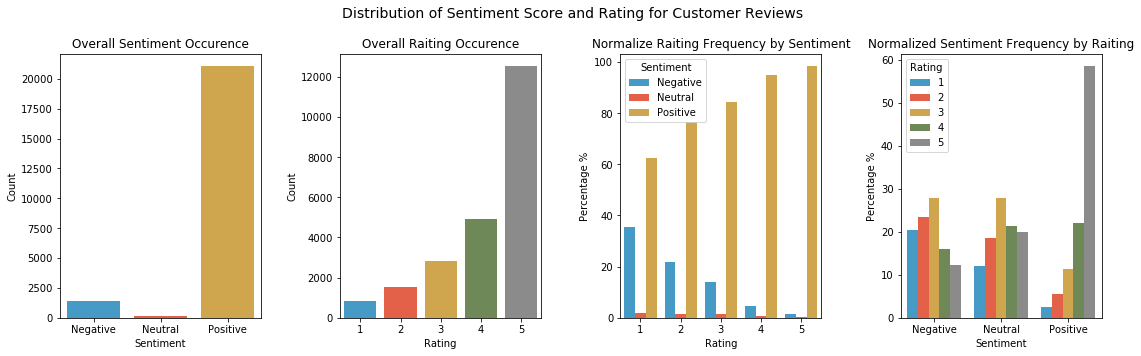

In [32]:
f, axes = plt.subplots(1,4, figsize=[16,5])
sns.countplot(x="Sentiment", data=df, ax=axes[0], order=["Negative","Neutral","Positive"])
axes[0].set_xlabel("Sentiment")
axes[0].set_ylabel("Count")
axes[0].set_title("Overall Sentiment Occurence")

sns.countplot(x="Rating", data=df, ax=axes[1])
axes[1].set_xlabel("Rating")
axes[1].set_ylabel("Count")
axes[1].set_title("Overall Raiting Occurence")

norm_barplot(x="Rating",y="Percentage",hue="Sentiment",data=df, ax=axes[2])
axes[2].set_xlabel("Rating")
axes[2].set_ylabel("Percentage %")
axes[2].set_title("Normalize Raiting Frequency by Sentiment")

norm_barplot(x="Sentiment",y="Percentage",hue="Rating",data=df, ax=axes[3])
axes[3].set_ylabel("Occurence Frequency")
axes[3].set_title("Normalized Sentiment Frequency by Raiting")
axes[3].set_xlabel("Sentiment")
axes[3].set_ylabel("Percentage %")

f.suptitle("Distribution of Sentiment Score and Rating for Customer Reviews", fontsize=14)
f.tight_layout()
f.subplots_adjust(top=0.85)
plt.show()

**Interpretation:** <br>
The last chunk, Visualization, plots the frequency of sentiments in a bar plot using matplotlib.

***


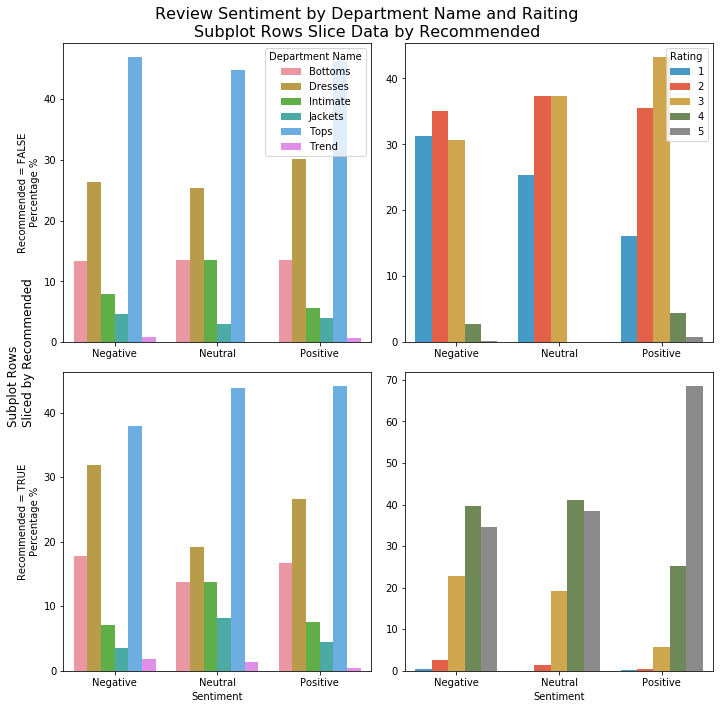

In [33]:

# Tweakable Variables (Note to Change Order Arguement if Xvar is changed)
xvar = "Sentiment"
huevar = "Department Name"
rowvar = "Recommended IND"

# Plot
f, axes = plt.subplots(2,2,figsize=(10,10), sharex=False,sharey=False)
for i,x in enumerate(set(df[rowvar][df[rowvar].notnull()])):
    norm_barplot(x=xvar,y="Percentage", hue=huevar,data=df[df[rowvar] == x],
                 ax=axes[i,0], order=["Negative","Neutral","Positive"])
    norm_barplot(x=xvar,y="Percentage", hue="Rating",data=df[df[rowvar] == x],
                 ax=axes[i,1], order=["Negative","Neutral","Positive"])

# Plot Aesthetics
axes[1,0].legend_.remove()
axes[1,1].legend_.remove()
axes[0,1].set_ylabel("")
axes[1,1].set_ylabel("")
axes[0,0].set_xlabel("")
axes[0,1].set_xlabel("")
axes[0,0].set_ylabel("Recommended = FALSE\nPercentage %")
axes[1,0].set_ylabel("Recommended = TRUE\nPercentage %")
axes[1,1].set_title("")

# Common title and ylabel
f.text(0.0, 0.5, 'Subplot Rows\nSliced by Recommended', va='center', rotation='vertical', fontsize=12)
f.suptitle("Review Sentiment by Department Name and Raiting\nSubplot Rows Slice Data by Recommended", fontsize=16)
f.tight_layout()
f.subplots_adjust(top=0.93)
plt.show()

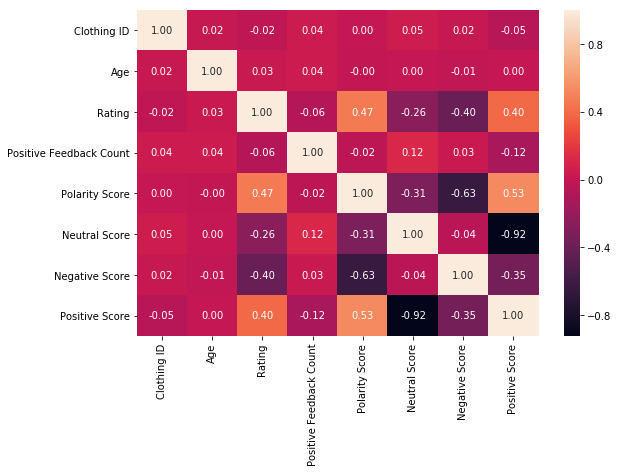

In [34]:
# Plot Correlation Matrix
f, ax = plt.subplots(figsize=[9,6])
ax = sns.heatmap(df.corr(), annot=True, fmt=".2f")

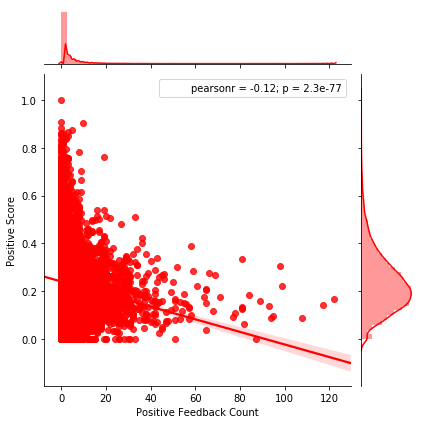

In [35]:
# Sentiment Positivity Score by Positive Feedback Count
ax = sns.jointplot(x= df["Positive Feedback Count"], y=df["Positive Score"], kind='reg', color='r')
plt.show()

Interestingly, there appears to be a substantial negative correlation between Positive Feedback Count and Positive Score, which suggests that the most acclaimed reviews on the platform are probably in the form on constructive criticism, rather than outright positivity.

## 5. Word Distribution and Word Cloud <a id="Word Distribution and Word Cloud"></a> <br>

** For this section, I deviated from the book and heavily relied upon the following online resources:** <br>
- [Kaggle Longdoa: Word Cloud in Python](https://www.kaggle.com/longdoan/word-cloud-with-python)
- [Word Cloud Package Forum](https://github.com/amueller/word_cloud/issues/134)
- [Amueller Github](https://amueller.github.io/word_cloud/auto_examples/masked.html)

In [36]:
stopwords = set(STOPWORDS)
size = (20,10)

def cloud(text, title, stopwords=stopwords, size=size):
    """
    Function to plot WordCloud
    Includes: 
    """
    # Setting figure parameters
    mpl.rcParams['figure.figsize']=(10.0,10.0)
    mpl.rcParams['font.size']=12
    mpl.rcParams['savefig.dpi']=100
    mpl.rcParams['figure.subplot.bottom']=.1 
    
    # Processing Text
    # Redundant when combined with my Preprocessing function
    wordcloud = WordCloud(width=1600, height=800,
                          background_color='black',
                          stopwords=stopwords,
                         ).generate(str(text))
    
    # Output Visualization
    fig = plt.figure(figsize=size, facecolor='k')
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.title(title, fontsize=50,color='y')
    plt.tight_layout(pad=0)
    plt.show()
    
# Frequency Calculation [One-Gram]
def wordfreqviz(text, x):
    word_dist = nltk.FreqDist(text)
    top_N = x
    rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
    matplotlib.style.use('ggplot')
    rslt.plot.bar(rot=0)

def wordfreq(text, x):
    word_dist = nltk.FreqDist(text)
    top_N = x
    rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')
    return rslt

#### **Code Explanation:** <br>
This code creates the word cloud visualization function. This function’s mathematical processes are hidden, since it does not explicitly state that it determines the frequency occurrence of each word in relation to the entire dictionary of words. Within the function, the Setting Function Parameter section creates the graphic structure using matplotlib. Then the text is formatted, and the word frequency is determined. Finally, the matplotlib structure is filled with words, where the larger the word size, the higher the word occurrence. 

### Visualize Titles

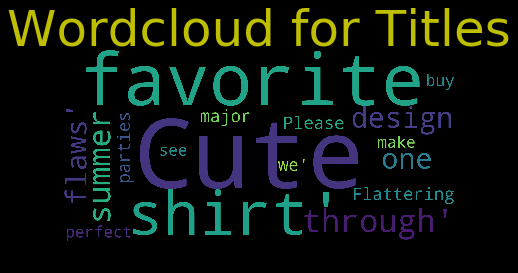

In [37]:
# Modify Stopwords to Exclude Class types, suchs as "dress"
new_stop = set(STOPWORDS)
new_stop.update([x.lower() for x in list(df["Class Name"][df["Class Name"].notnull()].unique())]
                + ["dress", "petite"])

# Cloud
cloud(text= df.Title[df.Title.notnull()].astype(str).values,
      title="Wordcloud for Titles",
      stopwords= new_stop,
      size = (7,4))

### Visualize Reviews

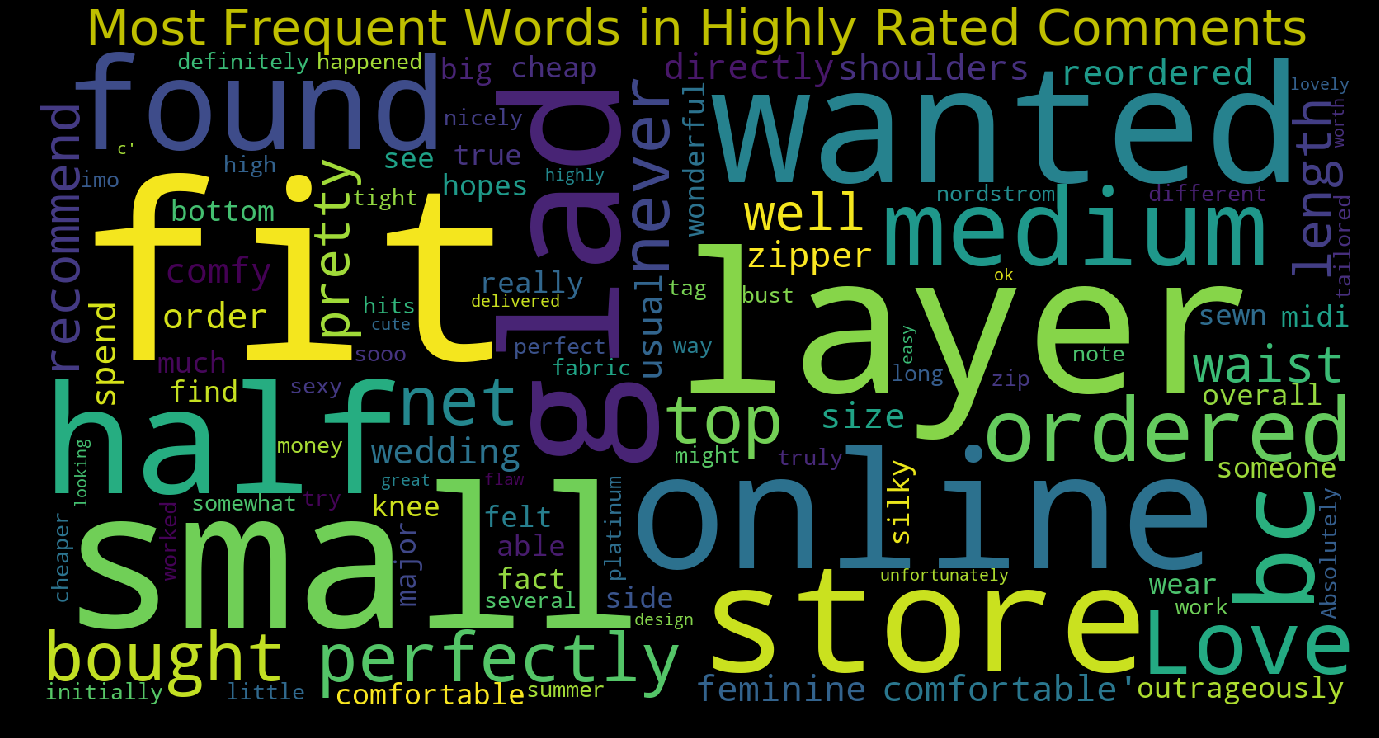

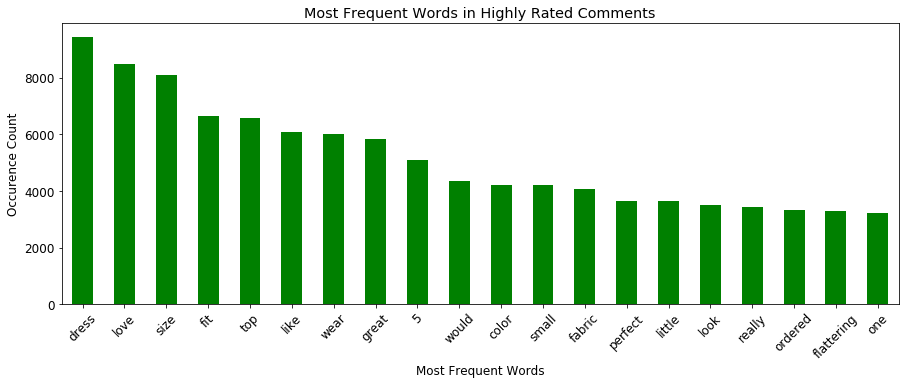

In [38]:
# Highly Raited
title ="Most Frequent Words in Highly Rated Comments"
temp = df['Review Text'][df.Rating.astype(int) >= 3]

# Modify Stopwords to Exclude Class types, suchs as "dress"
new_stop = set(STOPWORDS)
new_stop.update([x.lower() for x in list(df["Class Name"][df["Class Name"].notnull()].unique())]
                + ["dress", "petite"])

# Cloud
cloud(text= temp.values, title=title,stopwords= new_stop)

# Bar Chart
wordfreq(preprocessing(temp),20).plot.bar(rot=45, legend=False,figsize=(15,5), color='g',
                          title= title)
plt.ylabel("Occurence Count")
plt.xlabel("Most Frequent Words")
plt.show()

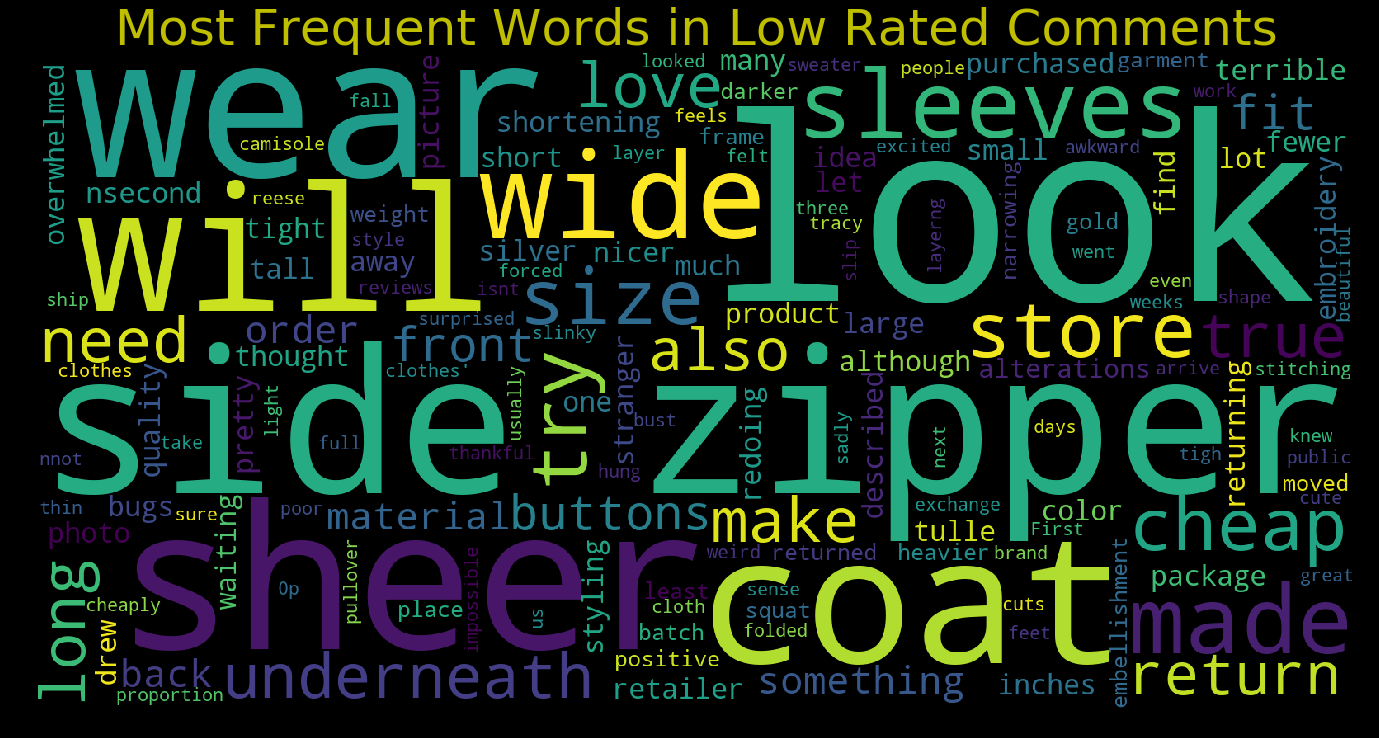

In [39]:
# Low Raited
title ="Most Frequent Words in Low Rated Comments"
temp = df['Review Text'][df.Rating.astype(int) < 3]

# Modify Stopwords to Exclude Class types, suchs as "dress"
new_stop = set(STOPWORDS)
new_stop.update([x.lower() for x in list(df["Class Name"][df["Class Name"].notnull()].unique())]
                + ["dress", "petite", "skirt","shirt"])

# Cloud
cloud(temp.values, title= title, stopwords = new_stop)

#### **Code Interpretation:** <br>
At a first glance the most common words overlap significantly between good and bad reviews. Indeed, the observation that “Dress” and “Top” are the most common words is reflected by the disproportionate number of reviews in the dress category. Looking at the rest of the words, the positive reviews tend to use words such as: Love, Comfortable, Great, Style, Small, Flattering, Wear, True. This offers the first big insight because within the expected positive words, the words “True” stands out, since it suggest consistency between customer expectation of the product and what the product actually delivered. In terms of negative reviews, notable words include: unflattering, big, unfortunately appear. These negative words represent the small proportion of words in the negative reviews. This suggests that either people are expressing their criticism with negative prefixes, such as “Not Pretty”, or people are sticking to constructive criticism only, addressing problems of fit or appearance rather than simply expressing anger.

The central flaw of these word clouds is that they only show the distribution of individual words. This removes the context of the word, as well as disregard negative prefixes. In order to solve this problem I will utilize n-grams, which increases the size of observed values from one word to multiple words, enabling frequency counts to be conducted to word sequences. Although I would have prefered to visualize these findings through the use of Word Clouds, I was unable to program this in, thus leaving me with a simple table.

In the section below, the 15th most frequent 2 and 3 gram sequences are on display for both the good and bad reviews.

### I am curious to see the wordcloud by Specific group.

Perhaps I can seperate this analysis between clouds and ngrams.

1. Department Name
2. Over 20 Positive Review Count
3. Whether it was Recommended IND

In [40]:
department_set = df["Department Name"][df["Department Name"].notnull()].unique()

def cloud_by_category(data, category, subclass):
    """
    Function to create a wordcloud by class and subclass
    Category signifies the column variable
    Subclass refers to the specific value within the categorical variable
    """
    new_stop = set(STOPWORDS)
    new_stop.update([x.lower() for x in list(data["Class Name"][data["Class Name"].notnull()].unique())]
                   + [x.lower() for x in list(data["Department Name"][data["Department Name"].notnull()].unique())]
                   + ["dress", "petite", "jacket","top"])

    # Cloud
    cloud(text= data["Review Text"][data[category]== subclass],
          title="WordCloud for {}".format(subclass),
          stopwords= new_stop,
          size = (10,6))

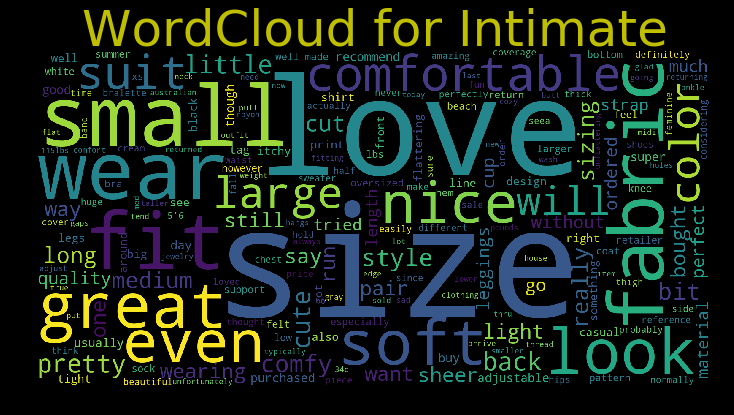

In [41]:
cloud_by_category(df, "Department Name", department_set[0])

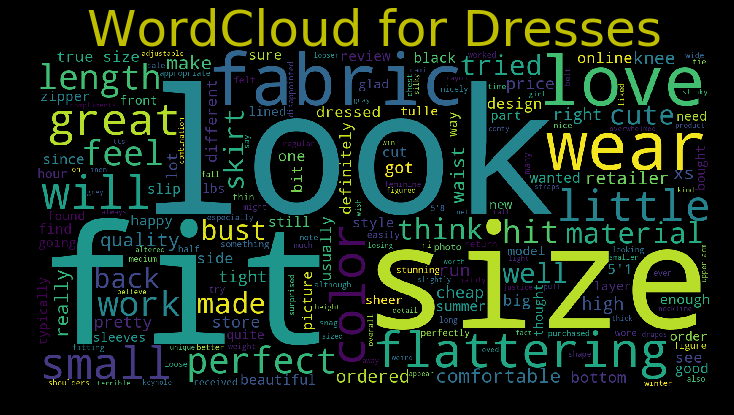

In [42]:
cloud_by_category(df, "Department Name", department_set[1])

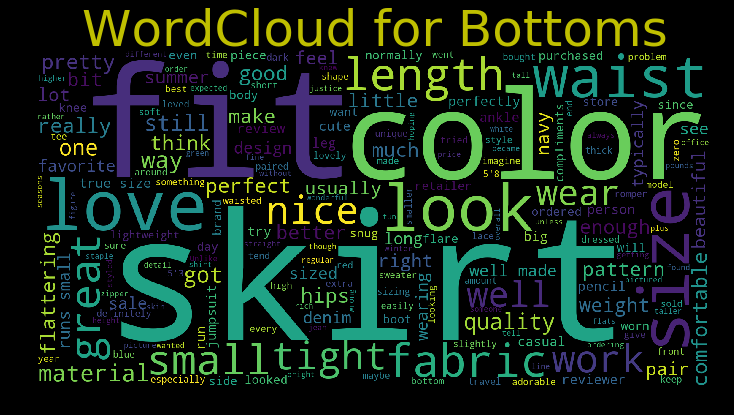

In [43]:
cloud_by_category(df, "Department Name", department_set[2])

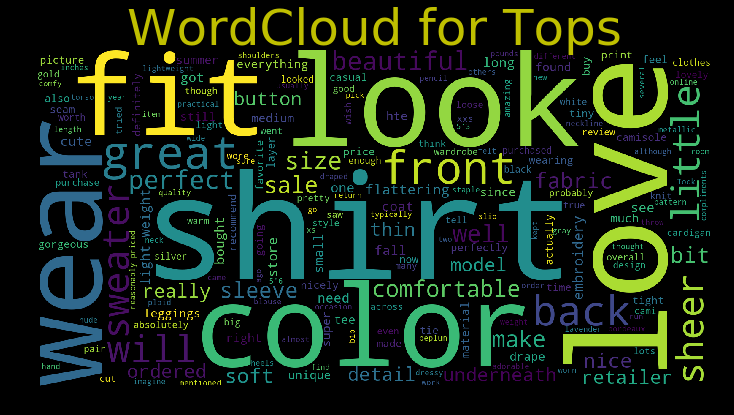

In [44]:
cloud_by_category(df, "Department Name", department_set[3])

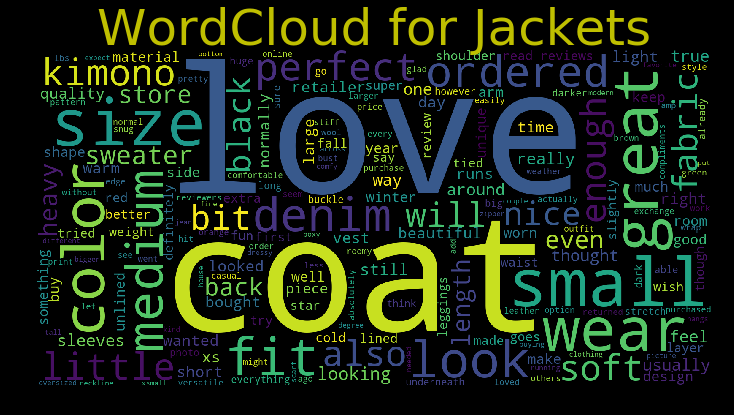

In [45]:
cloud_by_category(df, "Department Name", department_set[4])

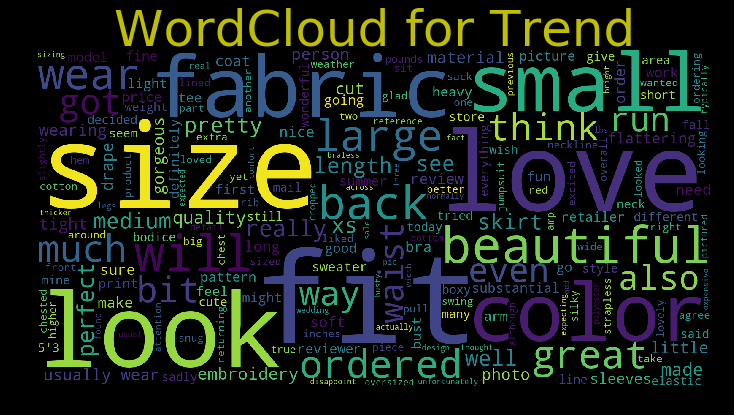

In [46]:
cloud_by_category(df, "Department Name", department_set[5])

## Extract Specific Words

Expand on this section by making new variables out of interesting words.

***
## N Grams by Recommended Feature

Create overlapping variable, which singles out worst rating and non-recommendations.

In [47]:
## Helper Functions
from nltk.util import ngrams
from collections import Counter
def get_ngrams(text, n):
    n_grams = ngrams((text), n)
    return [ ' '.join(grams) for grams in n_grams]

def gramfreq(text,n,num):
    # Extracting bigrams
    result = get_ngrams(text,n)
    # Counting bigrams
    result_count = Counter(result)
    # Converting to the result to a data frame
    df = pd.DataFrame.from_dict(result_count, orient='index')
    df = df.rename(columns={'index':'words', 0:'frequency'}) # Renaming index column name
    return df.sort_values(["frequency"],ascending=[0])[:num]

def gram_table(data, gram, length):
    out = pd.DataFrame(index=None)
    for i in gram:
        table = pd.DataFrame(gramfreq(preprocessing(data),i,length).reset_index())
        table.columns = ["{}-Gram".format(i),"Occurence"]
        out = pd.concat([out, table], axis=1)
    return out

In [48]:
gram_table(data= df['Review Text'][df["Recommended IND"].astype(int) == 0], gram=[1,2,3,4,5], length=30)

,1-Gram,Occurence,2-Gram,Occurence,3-Gram,Occurence,4-Gram,Occurence,5-Gram,Occurence
0,dress,1976,wanted love,243,really wanted love,70,really wanted love dress,15,reference measurements 38 30 40,3
1,like,1780,going back,215,wanted love dress,65,looked like maternity top,10,photos reference measurements 38 30,3
2,top,1572,looked like,187,really wanted like,40,really wanted like top,9,back really wanted like dress,3
3,would,1348,looks like,153,made look like,29,really wanted like dress,9,wearing medium photos reference measurements,3
4,fit,1327,really wanted,151,wanted love top,28,5 4 120 lbs,8,medium photos reference measurements 38,3
5,fabric,1245,made look,135,fit true size,28,really wanted love top,7,reference 5 7 125 lb,3
6,size,1209,look like,126,ordered usual size,25,going back really wanted,6,arm holes also cut low,3
7,back,1039,5 4,113,way much fabric,25,measurements 38 30 40,6,going back wanted love dress,3
8,look,965,felt like,109,sadly going back,24,5 7 140 lbs,6,shame color pictured wanted made,2
9,love,928,true size,104,usually wear size,23,would look better someone,5,reviews thought would give try,2


In [49]:
gram_table(data= df['Review Text'][df["Recommended IND"].astype(int) == 1], gram=[1,2,3,4,5], length=30)

,1-Gram,Occurence,2-Gram,Occurence,3-Gram,Occurence,4-Gram,Occurence,5-Gram,Occurence
0,dress,8591,true size,1243,fits true size,264,compliments every time wear,46,34b 26 waist 36 hips,27
1,love,8017,love dress,657,fit true size,192,26 waist 36 hips,32,get compliments every time wear,21
2,size,7561,5 4,622,received many compliments,163,34b 26 waist 36,28,5 2 currently 33 25,17
3,fit,5995,usually wear,588,runs true size,143,looks great skinny jeans,25,115 lbs 30 dd 26,15
4,top,5846,looks great,574,love love love,138,get compliments every time,23,2 currently 33 25 37,13
5,wear,5678,fit perfectly,553,usually wear size,107,115 lbs 30 dd,22,lbs 30 dd 26 5,13
6,great,5584,well made,531,every time wear,81,love love love dress,22,115 lbs 30dd 26 5,13
7,like,5368,love top,524,ordered usual size,79,usually wear size 4,21,5 2 34b 26 waist,12
8,5,4678,5 3,488,small fit perfectly,72,5 4 120 lbs,20,5 5 tall 145 lbs,12
9,color,3887,fits perfectly,480,got many compliments,70,5 4 125 lbs,18,5 1 5 115 lbs,12


## Intelligible Supervised Learning

**Converting Text to a Model-able format: One Hot Encoding**

In [50]:
df['tokenized'] = df["Review Text"].astype(str).str.lower() # Turn into lower case text
df['tokenized'] = df.apply(lambda row: tokenizer.tokenize(row['tokenized']), axis=1) # Apply tokenize to each row
df['tokenized'] = df['tokenized'].apply(lambda x: [w for w in x if not w in stop_words]) # Remove stopwords from each row
df['tokenized'] = df['tokenized'].apply(lambda x: [ps.stem(w) for w in x]) # Apply stemming to each row
all_words = nltk.FreqDist(preprocessing(df['Review Text'])) # Calculate word occurence from whole block of text

vocab_count = 300
word_features= list(all_words.keys())[:vocab_count] # 5000 most recurring unique words
print("Number of words columns (One Hot Encoding): {}".format(len(all_words)))

Number of words columns (One Hot Encoding): 14034


In [51]:
labtext= list(zip(df.tokenized, (df["Recommended IND"]))) 

In [52]:
# Function to create model features
# for each review, records which uniqeue words out of the whole text body are present
def find_features(document):
    words = set(document)
    features = {}
    for w in word_features:
        features[w] = (w in words)

    return features

In [53]:
# Apply function to data
featuresets = [(find_features(text), LABEL) for (text, LABEL) in labtext]
len(featuresets)

22628

In [54]:
training_set = featuresets[:15000]
testing_set = featuresets[15000:]

## Naive Bayes

Side on WHY this model was selected.

In [55]:
classifier = nltk.NaiveBayesClassifier.train(training_set)
# Posterior = prior_occurence * likelihood / evidence

In [56]:
print("Classifier accuracy percent:",(nltk.classify.accuracy(classifier, testing_set))*100)
print(classifier.show_most_informative_features(40))

Classifier accuracy percent: 81.1877294179
Most Informative Features
                    dear = True                0 : 1      =     13.8 : 1.0
                   shave = True                0 : 1      =      7.7 : 1.0
                    boot = True                1 : 0      =      7.1 : 1.0
                 weather = True                1 : 0      =      6.2 : 1.0
             cheesecloth = True                0 : 1      =      4.6 : 1.0
                   climb = True                0 : 1      =      4.6 : 1.0
                    skir = True                0 : 1      =      4.6 : 1.0
                    sass = True                0 : 1      =      4.6 : 1.0
                   march = True                0 : 1      =      4.6 : 1.0
                timeless = True                1 : 0      =      4.0 : 1.0
                     tag = True                0 : 1      =      3.5 : 1.0
                 neutral = True                1 : 0      =      3.3 : 1.0
                     snd = True

## Word2Vec

In [57]:
import gensim
from gensim.models import word2vec
import os
os.chdir(r"D:\My Computer\DATA\Retail")
os.listdir()

['featuresets.pickle', 'GoogleNews-vectors-negative300.bin.gz']

In [58]:
# Load Google's pre-trained Word2Vec model.
model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)

In [59]:
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Label,Polarity Score,Neutral Score,Negative Score,Positive Score,Sentiment,tokenized
0,767,33,NaN,Absolutely wonderful - silky and sexy and comfortable,4,1,0,Initmates,Intimate,Intimates,1,0.8932,0.272,0.000,0.728,Positive,"[absolut, wonder, silki, sexi, comfort]"
1,1080,34,NaN,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on me- hits just a little below the knee. would definitely be a true midi on someone who is truly petite.",5,1,4,General,Dresses,Dresses,1,0.9729,0.664,0.000,0.336,Positive,"[love, dress, sooo, pretti, happen, find, store, glad, bc, never, would, order, onlin, bc, petit, bought, petit, 5, 8, love, length, hit, littl, knee, would, definit, true, midi, someon, truli, petit]"
2,1077,60,Some major design flaws,"I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - ...",3,0,0,General,Dresses,Dresses,1,0.9427,0.792,0.027,0.181,Positive,"[high, hope, dress, realli, want, work, initi, order, petit, small, usual, size, found, outrag, small, small, fact, could, zip, reorder, petit, medium, ok, overal, top, half, comfort, fit, nice, bottom, half, tight, layer, sever, somewhat, cheap, net, layer, imo, major, design, flaw, net, layer, sewn, directli, zipper, c]"
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,1,0,General Petite,Bottoms,Pants,1,0.5727,0.340,0.226,0.434,Positive,"[love, love, love, jumpsuit, fun, flirti, fabul, everi, time, wear, get, noth, great, compliment]"
4,847,47,Flattering shirt,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,1,6,General,Tops,Blouses,1,0.9291,0.700,0.000,0.300,Positive,"[shirt, flatter, due, adjust, front, tie, perfect, length, wear, leg, sleeveless, pair, well, cardigan, love, shirt]"


In [60]:
w2vec = word2vec.Word2Vec(df["tokenized"], min_count=5, size=200)

In [61]:
w2vec.most_similar(["versatil"],topn=10)

D:\WindowsApps\Anaconda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('casual', 0.8835383653640747),
 ('busi', 0.8635358214378357),
 ('statement', 0.8628028631210327),
 ('classi', 0.8579908609390259),
 ('throw', 0.8575127720832825),
 ('everyday', 0.8522285223007202),
 ('dressi', 0.8483871221542358),
 ('fun', 0.8429701328277588),
 ('varieti', 0.8213145732879639),
 ('fanci', 0.8177039623260498)]

In [62]:
w2vec.most_similar(["potato"],topn=10)

D:\WindowsApps\Anaconda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('shapeless', 0.913311243057251),
 ('sack', 0.885644257068634),
 ('giant', 0.8762199878692627),
 ('circu', 0.8721179962158203),
 ('somehow', 0.851029098033905),
 ('dumpi', 0.8493863940238953),
 ('muumuu', 0.8395460844039917),
 ('frumpi', 0.8327735662460327),
 ('halloween', 0.8269076347351074),
 ('1920', 0.8253375291824341)]

In [63]:
w2vec.most_similar(["worst"],topn=10)

D:\WindowsApps\Anaconda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('reduc', 0.9503207206726074),
 ('common', 0.9402958154678345),
 ('continu', 0.9379326105117798),
 ('battl', 0.9353609681129456),
 ('repair', 0.9334667921066284),
 ('shimmi', 0.9307435750961304),
 ('flatten', 0.9292183518409729),
 ('manufactur', 0.9287412762641907),
 ('seriou', 0.925951361656189),
 ('children', 0.9247856140136719)]

In [64]:
w2vec.most_similar(["rag"],topn=10)

D:\WindowsApps\Anaconda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('mumu', 0.9039055109024048),
 ('circu', 0.9017899632453918),
 ('bathrob', 0.8933277726173401),
 ('footbal', 0.877085268497467),
 ('discomfort', 0.8686258792877197),
 ('costum', 0.8630992770195007),
 ('elsewher', 0.857708752155304),
 ('pointi', 0.8571102619171143),
 ('bunchi', 0.8548153042793274),
 ('26p', 0.85433030128479)]

In [65]:
w2vec.most_similar(["compliment"],topn=10)

D:\WindowsApps\Anaconda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('complement', 0.889276385307312),
 ('ton', 0.8477096557617188),
 ('numer', 0.7613081932067871),
 ('mani', 0.68112713098526),
 ('everytim', 0.6577292680740356),
 ('whenev', 0.6541430950164795),
 ('alik', 0.6415671110153198),
 ('constant', 0.6337926387786865),
 ('friend', 0.6324634552001953),
 ('stranger', 0.6295003890991211)]

In [66]:
w2vec.most_similar(["love"],topn=10)

D:\WindowsApps\Anaconda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('ador', 0.8446653485298157),
 ('amaz', 0.6958482265472412),
 ('gorgeou', 0.6803557872772217),
 ('beauti', 0.6514734029769897),
 ('fantast', 0.6499114632606506),
 ('fabul', 0.6387823820114136),
 ('sweet', 0.6102054119110107),
 ('awesom', 0.6075011491775513),
 ('wonder', 0.6006308794021606),
 ('stun', 0.5944862961769104)]

In [67]:
w2vec.most_similar(["shame"],topn=10)

D:\WindowsApps\Anaconda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('jut', 0.9083734750747681),
 ('imposs', 0.9037503004074097),
 ('favor', 0.9011027812957764),
 ('promin', 0.8980072140693665),
 ('bat', 0.8937145471572876),
 ('ju', 0.8881216049194336),
 ('reluctantli', 0.8863672614097595),
 ('bizarr', 0.8862478733062744),
 ('heartbroken', 0.8854873180389404),
 ('incorrectli', 0.8847410678863525)]

In [68]:
w2vec.most_similar(["dear"],topn=10)

D:\WindowsApps\Anaconda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('refund', 0.9520602226257324),
 ('manufactur', 0.9421108365058899),
 ('ranna', 0.9419302344322205),
 ('fail', 0.9403684735298157),
 ('gill', 0.9392745494842529),
 ('met', 0.9392049312591553),
 ('swimwear', 0.938987135887146),
 ('british', 0.9376493096351624),
 ('simplist', 0.936141848564148),
 ('maker', 0.9357542991638184)]